In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Ver con glob para carpeta local
df= pd.read_csv('DEN_2020.csv', sep=';')

In [3]:
#Cantidad de Departamentos, Distritos y Provincias
df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
print("La cantidad de departamentos es:", df['Departamento'].nunique())
n=df['Dep-Prov-Distrito'].nunique()
print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
print("La cantidad de provincias es:", df['Dep-Prov'].nunique())

La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89


In [4]:
df = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'numero_casos','Casos', 'Año']] 
df1 = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'Casos']] 
listaDistrito = df['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print(listaDistrito)
i=0
for dis in listaDistrito:
    df1.loc[df1['Dep-Prov-Distrito']==dis,'ID_distrito']=i
    i=i+1

['LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE', 'CUSCO, LA CONVENCION, PICHARI', 'SAN MARTIN, SAN MARTIN, HUIMBAYOC', 'LIMA, LIMA, RIMAC', 'LORETO, MAYNAS, ALTO NANAY', 'SAN MARTIN, MOYOBAMBA, CALZADA', 'PUNO, CARABAYA, SAN GABAN', 'CUSCO, QUISPICANCHI, CAMANTI', 'JUNIN, SATIPO, MAZAMARI', 'SAN MARTIN, MOYOBAMBA, HABANA', 'LORETO, MARISCAL RAMON CASTILLA, SAN PABLO', 'SAN MARTIN, LAMAS, LAMAS', 'LAMBAYEQUE, CHICLAYO, LA VICTORIA', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'CAJAMARCA, JAEN, COLASAY', 'AYACUCHO, LA MAR, SANTA ROSA', 'LORETO, REQUENA, JENARO HERRERA', 'LAMBAYEQUE, CHICLAYO, JOSE LEONARDO ORTIZ', 'AREQUIPA, CARAVELI, BELLA UNION', 'UCAYALI, ATALAYA, SEPAHUA', 'JUNIN, HUANCAYO, SAPALLANGA', 'LIMA, LIMA, LOS OLIVOS', 'HUANUCO, PUERTO INCA, PUERTO INCA', 'LORETO, MAYNAS, NAPO', 'CUSCO, LA CONVENCION, MEGANTONI', 'LORETO, PUTUMAYO, TENIENTE MANUEL CLAVERO', 'SAN MARTIN, LAMAS, TABALOSOS', 'ICA, CHINCHA, EL CARMEN', 'UCAYALI, PADRE ABAD, NESHUYA', 'MADRE DE DIOS, TAMBOPATA, LAS PIEDRAS', 'LORETO

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


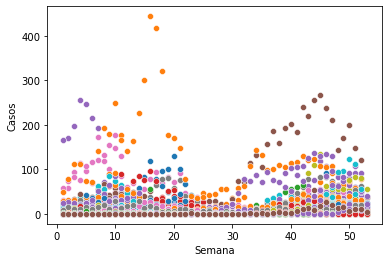

In [5]:
timeSeries = pd.DataFrame()
#listaDistrito = listaDistrito[0:15]
for dis in listaDistrito:
    distrito=df[df['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.reset_index(drop=True)
    distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    timeSeries = timeSeries.append(distrito['Casos'], ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['Casos'], x= distrito['Semana'])
plt.show()

In [6]:
from tsfresh import extract_features

#features extraction
extracted_features = extract_features(df1, column_id='ID_distrito', column_sort='Semana', column_value='Casos')
extracted_features

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.19it/s]


,Casos__variance_larger_than_standard_deviation,Casos__has_duplicate_max,Casos__has_duplicate_min,Casos__has_duplicate,Casos__sum_values,Casos__abs_energy,Casos__mean_abs_change,Casos__mean_change,Casos__mean_second_derivative_central,Casos__median,...,Casos__permutation_entropy__dimension_6__tau_1,Casos__permutation_entropy__dimension_7__tau_1,Casos__query_similarity_count__query_None__threshold_0.0,"Casos__matrix_profile__feature_""min""__threshold_0.98","Casos__matrix_profile__feature_""max""__threshold_0.98","Casos__matrix_profile__feature_""mean""__threshold_0.98","Casos__matrix_profile__feature_""median""__threshold_0.98","Casos__matrix_profile__feature_""25""__threshold_0.98","Casos__matrix_profile__feature_""75""__threshold_0.98",Casos__mean_n_absolute_max__number_of_maxima_7
0.0,0.0,1.0,1.0,1.0,3.0,3.0,0.115385,0.000000,0.000000,0.0,...,0.865676,0.978014,NaN,3.996667,7.505553,6.743109,7.416348,7.416348,7.416348,0.428571
1.0,1.0,0.0,1.0,1.0,1210.0,57756.0,9.153846,0.076923,-0.019608,14.0,...,3.697914,3.850148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.428571
2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.038462,0.000000,0.000000,0.0,...,0.501793,0.610649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857
3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.038462,0.000000,0.000000,0.0,...,0.501793,0.610649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857
4.0,0.0,0.0,1.0,1.0,11.0,21.0,0.346154,0.000000,0.000000,0.0,...,1.531829,1.649675,NaN,2.567184,4.472136,3.883626,4.472136,3.139570,4.472136,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,0.0,0.0,1.0,1.0,3.0,5.0,0.115385,0.000000,-0.009804,0.0,...,0.641429,0.751180,NaN,4.898979,4.898979,4.898979,4.898979,4.898979,4.898979,0.428571
372.0,1.0,0.0,1.0,1.0,49.0,145.0,0.903846,-0.057692,0.029412,0.0,...,2.761183,2.963720,NaN,1.224415,5.291503,3.139015,3.049150,2.986435,3.646653,3.571429
373.0,1.0,0.0,1.0,1.0,56.0,556.0,1.115385,0.000000,0.000000,0.0,...,1.793323,1.998576,NaN,1.563185,5.291503,2.900197,2.156035,2.082158,3.546761,7.142857
374.0,1.0,0.0,1.0,1.0,79.0,937.0,0.961538,0.423077,0.137255,0.0,...,2.494174,2.735751,NaN,1.508627,5.291503,2.864085,2.996289,2.348299,2.996289,9.857143


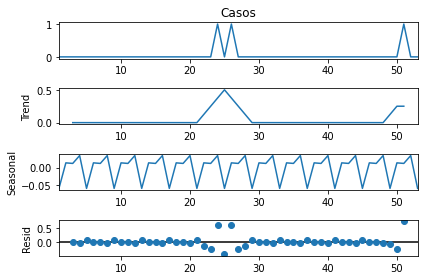

In [7]:
import tsfresh
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
Trend=[]
Season=[]
for dis in listaDistrito[:1]:
    distrito=df1[df1['Dep-Prov-Distrito']==dis]
    distrito = distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.set_index('Semana', drop=True)
    #distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    #distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #print(df2)
    result = seasonal_decompose(distrito['Casos'], model='additive', period=4)
    result.plot()
    #print(result.trend.values)
    Trend.append(result.trend.values.tolist())
    Season.append(result.seasonal.values.tolist())
    #pyplot.show()



In [8]:
features = pd.DataFrame()
Mean=[]
Var=[]
aCF1=[]
#Trend=[]
Linearity=[]
Curvature=[]
#Season=[]
Peak=[]
Entropy=[]
Lumpiness=[]
Lshift=[]
Vchange=[]
Fspots=[]
Cpoints=[]
Klscore=[]
ChangeIdx=[]

In [9]:
for dis in listaDistrito:
    distrito_1=df['Dep-Prov-Distrito']==dis
    casos_distrito1=df[distrito_1]
    casos_distrito1 = casos_distrito1.reset_index(drop=True)
    casos_distrito1 = casos_distrito1['Casos']
    casos_distrito1 = casos_distrito1.replace('nan', np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace(0, np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace('nan', np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #Features
    mean=tsfresh.feature_extraction.feature_calculators.mean(casos_distrito1)
    var=tsfresh.feature_extraction.feature_calculators.variance(casos_distrito1)
    ACF1=tsfresh.feature_extraction.feature_calculators.autocorrelation(casos_distrito1,1)
    #trend=
    #linear_trend=tsfresh.feature_extraction.feature_calculators.linear_trend(casos_distrito1, {"attr": 'Casos'})
    #curv=
    peak=tsfresh.feature_extraction.feature_calculators.number_peaks(casos_distrito1,20)
    entropy=tsfresh.feature_extraction.feature_calculators.sample_entropy(casos_distrito1)
    #lump = tsfresh.feature_extraction.feature_calculators.variation_coefficient(casos_distrito1)
    cpoints=tsfresh.feature_extraction.feature_calculators.number_crossing_m(casos_distrito1,5)
    Mean.append(mean)
    Var.append(var)
    aCF1.append(ACF1)
    Peak.append(peak)
    Entropy.append(entropy)
    Cpoints.append(cpoints)

In [10]:
#Season

In [11]:
#Mean

In [12]:
data_tuples = list(zip(Mean,Var,aCF1, Peak,Entropy,Cpoints))
features = pd.DataFrame(data_tuples, columns =['Mean', 'Var', 'ACF1','Peak','Entropy','Cpoints']) 
# print the data 
features

,Mean,Var,ACF1,Peak,Entropy,Cpoints
0,0.056605,0.053400,0.678333,0,0.042523,0
1,22.830189,568.518330,0.691080,0,0.414434,5
2,0.018869,0.018512,-0.000370,0,0.040005,0
3,0.018869,0.018512,-0.000370,0,0.040005,0
4,0.207548,0.353150,0.669607,0,0.046424,0
...,...,...,...,...,...,...
371,0.056605,0.091136,0.409405,0,0.040822,0
372,0.924529,1.881095,0.576490,0,0.160968,1
373,1.056605,9.374153,0.512434,0,0.057550,1
374,1.490567,15.457456,0.578282,0,0.060995,1


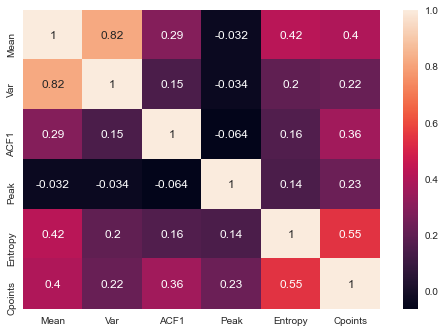

In [64]:
corr_df = features.corr()
#print("The correlation DataFrame is:")
#print(corr_df, "\n")
sns.heatmap(corr_df, annot=True)
plt.show()

# Funciones de Distancias

In [13]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

# Distancias para kmeans 

In [14]:
#Euclidean
f_euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(1,n):
        #print("j",j)
        f_euclidean_dist[i,j] = euclidean(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
        
#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        corr_dist[i,j] = corr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
        
#scorr
f_scorr_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
       # print("j",j)
        f_scorr_dist[i,j] = scorr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#DTW
f_dtw_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(0,n):
        # print("j",j)
        f_dtw_dist[i,j] = fast_DTW(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

In [15]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

#relevance_table = calculate_relevance_table(extracted_features, y)
#relevance_table = relevance_table[relevance_table.relevant]
#relevance_table.sort_values("p_value", inplace=True)
#print(relevance_table.loc["feature"][:11])


## Cálculos de scores

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
k=7

# Juan Vicente

In [17]:
from sklearn.preprocessing import LabelEncoder
DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter

In [27]:
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

HAC_EUCLIDEAN=[]
HAC_CORRELATION=[]
HAC_SPEARMAN=[]
HAC_DTW=[]
for k in list(range(2,8)):
    #Experimentos HAC
    HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(f_euclidean_dist)
    print("HAC + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, HAC_euc))
    HAC_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, HAC_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, HAC_euc))
    print("DUNN: ",dunn(HAC_euc, f_euclidean_dist, 'farthest', 'farthest'))

    HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
    print("HAC + corr distance: ")
    print("SC: ",silhouette_score(corr_dist,HAC_corr))
    HAC_CORRELATION.append(silhouette_score(f_euclidean_dist, HAC_euc))
    print("CHZ: ",calinski_harabasz_score(corr_dist,HAC_corr))
    print("DUNN: ",dunn(HAC_corr, corr_dist, 'farthest', 'farthest'))

    HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(f_scorr_dist)
    print("HAC + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, HAC_scorr))
    HAC_SPEARMAN.append(silhouette_score(f_scorr_dist, HAC_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, HAC_scorr))
    print("DUNN: ",dunn(HAC_scorr, f_scorr_dist, 'farthest', 'farthest'))

    HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(f_dtw_dist)
    print("HAC + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, HAC_dtw))
    HAC_DTW.append(silhouette_score(f_dtw_dist, HAC_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, HAC_dtw))
    print("DUNN: ",dunn(HAC_dtw, f_dtw_dist, 'farthest', 'farthest'))

HAC + euclidian distance: 
SC:  0.9768466347084189
CHZ:  1189.8023825895696
DUNN:  1.6802812308819104
HAC + corr distance: 
SC:  0.5424087598507947
CHZ:  368.0526447451123
DUNN:  0.6236204496499229
HAC + scorr distance: 
SC:  0.5352604635659967
CHZ:  338.281445534371
DUNN:  0.6448357589805875
HAC + dtw distance: 
SC:  0.9763176903062737
CHZ:  1180.753420115941


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  1.6854660095891794
HAC + euclidian distance: 
SC:  0.9698323583119985
CHZ:  1185.3525398197614
DUNN:  2.385257844213336
HAC + corr distance: 
SC:  0.6955456929470558
CHZ:  841.2934136507411
DUNN:  0.6236204496499229
HAC + scorr distance: 
SC:  0.7242671523207544
CHZ:  800.7913033016147
DUNN:  0.6448357589805875
HAC + dtw distance: 
SC:  0.9690963886453011
CHZ:  1153.3229170060763


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  2.3778038661562144
HAC + euclidian distance: 
SC:  0.9456195596505015
CHZ:  2904.5277456553827
DUNN:  1.3521827192534475
HAC + corr distance: 
SC:  0.6482510278631396
CHZ:  737.7165759375858
DUNN:  0.6963150222847893
HAC + scorr distance: 
SC:  0.7652901146728956
CHZ:  1008.0393718090197
DUNN:  0.7582225043643336
HAC + dtw distance: 
SC:  0.9438048459760633
CHZ:  2805.7129221485593


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  1.3448884469142772
HAC + euclidian distance: 
SC:  0.9213419633215079
CHZ:  3500.9865582626903
DUNN:  0.41934780533809446
HAC + corr distance: 
SC:  0.5855683655394917
CHZ:  747.738340744865
DUNN:  0.6963150222847893
HAC + scorr distance: 
SC:  0.7862414092323916
CHZ:  1089.6031220637958
DUNN:  1.25
HAC + dtw distance: 
SC:  0.9180540665251117
CHZ:  3408.59512877979


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  0.4202194697451877
HAC + euclidian distance: 
SC:  0.9188023444476765
CHZ:  4635.024880381693
DUNN:  0.5073326798753378
HAC + corr distance: 
SC:  0.6149080666114163
CHZ:  882.2535654434412
DUNN:  1.6653867626037677
HAC + scorr distance: 
SC:  0.756534552525321
CHZ:  1191.3538579549436
DUNN:  1.25
HAC + dtw distance: 
SC:  0.9155555470957347


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


CHZ:  4498.291368412804
DUNN:  0.5119414225572163
HAC + euclidian distance: 
SC:  0.922098944759196
CHZ:  8322.25358162609
DUNN:  1.2567174433170336
HAC + corr distance: 
SC:  0.6508807012979443
CHZ:  998.6623828655274
DUNN:  1.6653867626037677
HAC + scorr distance: 
SC:  0.7821211475958395
CHZ:  1284.0525079554259


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


DUNN:  1.25
HAC + dtw distance: 
SC:  0.9188684552441808
CHZ:  7932.264978017556
DUNN:  1.248369012166047


In [30]:
KM_EUCLIDEAN=[]
KM_CORRELATION=[]
KM_SPEARMAN=[]
KM_DTW=[]

for k in list(range(2,8)):
    km_euc = KMeans(n_clusters=k).fit_predict(f_euclidean_dist)
    print("KM + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, km_euc))
    KM_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, km_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, km_euc))
    print("DUNN: ",dunn(km_euc, f_euclidean_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
    print("KM + corr distance: ")
    print("SC: ",silhouette_score(corr_dist, km_corr))
    KM_CORRELATION.append(silhouette_score(corr_dist, km_euc))
    print("CHZ: ",calinski_harabasz_score(corr_dist, km_corr))
    print("DUNN: ",dunn(km_corr, corr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_scorr = KMeans(n_clusters=k).fit_predict(f_scorr_dist)
    print("KM + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, km_scorr))
    KM_SPEARMAN.append(silhouette_score(f_scorr_dist, km_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, km_scorr))
    print("DUNN: ",dunn(km_scorr, f_scorr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_dtw = KMeans(n_clusters=k).fit_predict(f_dtw_dist)
    print("KM + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, km_dtw))
    KM_DTW.append(silhouette_score(f_dtw_dist, HAC_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, km_dtw))
    print("DUNN: ",dunn(km_dtw, f_dtw_dist, 'farthest', 'farthest'))

KM + euclidian distance: 
SC:  0.9768466347084189
CHZ:  1189.8023825895696
DUNN:  1.6802812308819104
-----------------------
KM + corr distance: 
SC:  0.5438787582527337
CHZ:  369.2197408654631
DUNN:  0.6236204496499229
-----------------------
KM + scorr distance: 
SC:  0.5352604635659967
CHZ:  338.281445534371
DUNN:  0.6448357589805875
-----------------------
KM + dtw distance: 
SC:  0.9763176903062737
CHZ:  1180.753420115941
DUNN:  1.6854660095891794
KM + euclidian distance: 
SC:  0.9488698256823145
CHZ:  1389.0012656382473
DUNN:  0.9797769734608003
-----------------------
KM + corr distance: 
SC:  0.7101558955658864
CHZ:  909.3930689346299
DUNN:  0.7115707846961807
-----------------------
KM + scorr distance: 
SC:  0.7337905551572633
CHZ:  941.6271113002048
DUNN:  0.89609411713349
-----------------------
KM + dtw distance: 
SC:  0.9642338718157454
CHZ:  1241.119516360504
DUNN:  1.7252172900287939
KM + euclidian distance: 
SC:  0.9437507540272652
CHZ:  2951.8727973624354
DUNN:  1.352

# Experimentos DBSCAN

El puntaje es negativo porque los puntos están en promedio más cerca de otro cluster, que del cuál ha sido asignado

In [31]:
DBSCAN_EUCLIDEAN=[]
DBSCAN_CORRELATION=[]
DBSCAN_SPEARMAN=[]
DBSCAN_DTW=[]

for k in list(range(2,8)):
    #CON EUCLIDEAN
    DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(f_euclidean_dist)
    print("DBSCAN + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, DB_euc))
    DBSCAN_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, DB_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, DB_euc))
    print("DUNN: ",dunn(DB_euc, f_euclidean_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON CORRELATION
    DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(corr_dist)
    print("DBSCAN + corr distance: ")
    print("SC: ",silhouette_score(corr_dist, DB_corr))
    DBSCAN_CORRELATION.append(silhouette_score(corr_dist, DB_corr))
    print("CHZ: ",calinski_harabasz_score(corr_dist, DB_corr))
    print("DUNN: ",dunn(DB_corr, corr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON SPEARMAN
    DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(f_scorr_dist)
    print("DBSCAN + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, DB_scorr))
    DBSCAN_SPEARMAN.append(silhouette_score(f_scorr_dist, DB_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, DB_scorr))
    print("DUNN: ",dunn(DB_scorr, f_scorr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON D TIME WARPING
    DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(f_dtw_dist)
    print("DBSCAN + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, DB_dtw))
    DBSCAN_DTW.append(silhouette_score(f_dtw_dist, DB_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, DB_dtw))
    print("DUNN: ",dunn(DB_dtw, f_dtw_dist, 'farthest', 'farthest'))

DBSCAN + euclidian distance: 
SC:  0.027155793557474012
CHZ:  1.089164566470377
DUNN:  8.649518571905484e-05
-----------------------
DBSCAN + corr distance: 
SC:  0.32915160531900906
CHZ:  116.35655132763713
DUNN:  0.7290940924720529
-----------------------
DBSCAN + scorr distance: 
SC:  0.7491648638194514
CHZ:  1121.551717108893
DUNN:  0.9722222222222223
-----------------------
DBSCAN + dtw distance: 
SC:  -0.20778263552186677
CHZ:  0.9415646237386347
DUNN:  8.59978377476155e-05
DBSCAN + euclidian distance: 
SC:  0.027155793557474012
CHZ:  1.089164566470377
DUNN:  8.649518571905484e-05
-----------------------
DBSCAN + corr distance: 
SC:  0.32915160531900906
CHZ:  116.35655132763713
DUNN:  0.7290940924720529
-----------------------
DBSCAN + scorr distance: 
SC:  0.7491648638194514
CHZ:  1121.551717108893
DUNN:  0.9722222222222223
-----------------------
DBSCAN + dtw distance: 
SC:  -0.20778263552186677
CHZ:  0.9415646237386347
DUNN:  8.59978377476155e-05
DBSCAN + euclidian distance: 


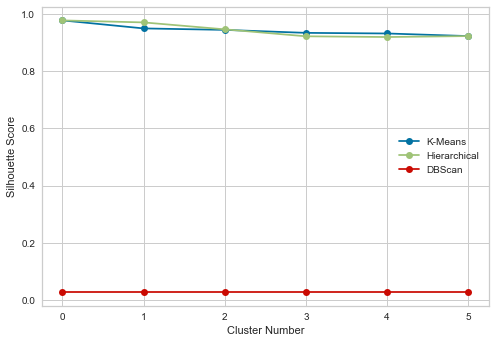

In [56]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(KM_EUCLIDEAN))),KM_EUCLIDEAN,'-o', label='K-Means')
plt.plot(list(range(len(HAC_EUCLIDEAN))),HAC_EUCLIDEAN,'-o', label='Hierarchical')
plt.plot(list(range(len(DBSCAN_EUCLIDEAN))),DBSCAN_EUCLIDEAN,'-o', label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Number')
plt.legend()
plt.show()

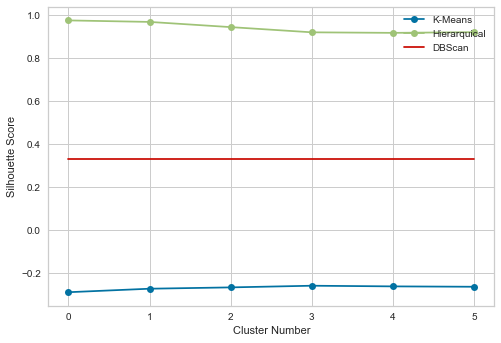

In [58]:
plt.plot(list(range(len(KM_CORRELATION))),KM_CORRELATION,'-o',  label='K-Means')
plt.plot(list(range(len(HAC_CORRELATION))),HAC_CORRELATION,'-o',  label='Hierarquical')
plt.plot(list(range(len(DBSCAN_CORRELATION))),DBSCAN_CORRELATION, label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Number')
plt.legend()
plt.show()

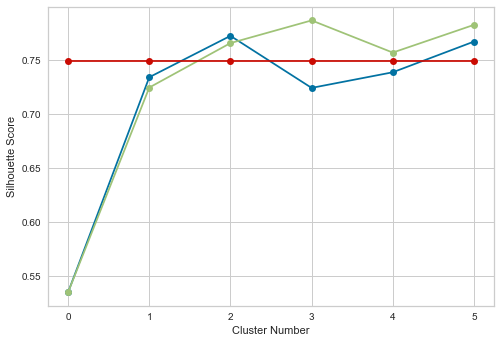

In [59]:
plt.plot(list(range(len(KM_SPEARMAN))),KM_SPEARMAN, '-o',  label='K-Means')
plt.plot(list(range(len(HAC_SPEARMAN))),HAC_SPEARMAN, '-o',  label='Hierarchical')
plt.plot(list(range(len(DBSCAN_SPEARMAN))),DBSCAN_SPEARMAN, '-o',  label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Number')
plt.show()

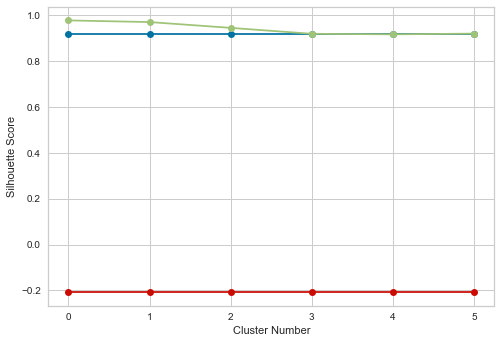

In [60]:
plt.plot(list(range(len(KM_DTW))),KM_DTW,'-o', label='K-Means')
plt.plot(list(range(len(HAC_DTW))),HAC_DTW,'-o',  label='Hierarchical')
plt.plot(list(range(len(DBSCAN_DTW))),DBSCAN_DTW,'-o', label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Number')
plt.show()